In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Small

In [146]:
# read in data with genres for users with errors
genres_df = pd.read_csv('error_genres_small.csv', header=None, names=['userId', 'movieID', 'genres'])
genres_df

,userId,movieID,genres
0,496,7151,Drama|Romance
1,496,3668,Drama|Romance
2,496,106920,Drama|Romance|Sci-Fi
3,516,457,Thriller
4,516,4291,Comedy|Crime
...,...,...,...
3499,483,1270,Adventure|Comedy|Sci-Fi
3500,483,1097,Children|Drama|Sci-Fi
3501,106,86880,Action|Adventure|Fantasy|IMAX
3502,106,41566,Adventure|Children|Fantasy


In [147]:
genres_df['genres'] = genres_df['genres'].apply(lambda x: np.array(x.split('|')))
genres_df

,userId,movieID,genres
0,496,7151,"[Drama, Romance]"
1,496,3668,"[Drama, Romance]"
2,496,106920,"[Drama, Romance, Sci-Fi]"
3,516,457,[Thriller]
4,516,4291,"[Comedy, Crime]"
...,...,...,...
3499,483,1270,"[Adventure, Comedy, Sci-Fi]"
3500,483,1097,"[Children, Drama, Sci-Fi]"
3501,106,86880,"[Action, Adventure, Fantasy, IMAX]"
3502,106,41566,"[Adventure, Children, Fantasy]"


In [148]:
error_genres = genres_df['genres'].tolist()
error_genres = np.concatenate(error_genres).ravel()
error_genres

array(['Drama', 'Romance', 'Drama', ..., 'Action', 'Adventure', 'Fantasy'],
      dtype='<U18')

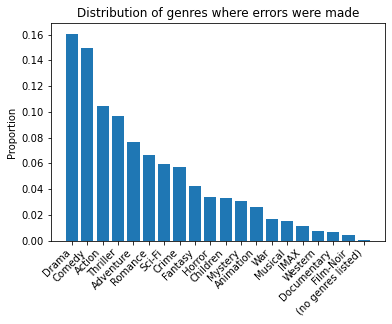

In [149]:
# plot!!!
unique_elements, counts_elements = np.unique(error_genres, return_counts=True)

# change counts to proportions
counts_elements = counts_elements / sum(counts_elements)

# make dictionary
counts = dict(zip(unique_elements, counts_elements))

# sort
sorted_genres = sorted(counts, key=counts.get, reverse=True)
sorted_counts = []
for w in sorted_genres:
    sorted_counts.append(counts[w])

# plot
plt.bar(sorted_genres, sorted_counts)
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of genres where errors were made')
plt.ylabel('Proportion')
plt.show()

In [150]:
# display proportions to see exact values
counts

{'(no genres listed)': 0.00021746221593998044,
 'Action': 0.10427313254322061,
 'Adventure': 0.0766554311188431,
 'Animation': 0.026421659236707622,
 'Children': 0.033380450146787,
 'Comedy': 0.14939654235076655,
 'Crime': 0.05697510057627487,
 'Documentary': 0.006741328694139393,
 'Drama': 0.16092203979558553,
 'Fantasy': 0.04240513210829618,
 'Film-Noir': 0.004349244318799609,
 'Horror': 0.03403283679460694,
 'IMAX': 0.011525497444818962,
 'Musical': 0.01543981733173861,
 'Mystery': 0.03087963466347722,
 'Romance': 0.06643470696966403,
 'Sci-Fi': 0.059258453843644664,
 'Thriller': 0.0966619549853213,
 'War': 0.016527128411438514,
 'Western': 0.007502446449929325}

### Distribution of all genres in small test set

In [151]:
# now plot full distribution for comparison
test_genres_df = pd.read_csv('test_genres_small.csv', header=None, names=['movieID', 'genres'])
test_genres_df.head(20)

,movieID,genres
0,6503,Action|Adventure|Comedy|Crime|Thriller
1,3948,Comedy
2,47,Mystery|Thriller
3,1253,Drama|Sci-Fi|Thriller
4,466,Action|Comedy|War
5,59615,Action|Adventure|Comedy|Sci-Fi
6,2728,Action|Drama|Romance|War
7,3841,Action|Comedy
8,3247,Comedy|Crime
9,3424,Drama


In [152]:
# split genres
test_genres_df['genres'] = test_genres_df['genres'].apply(lambda x: np.array(x.split('|')))

test_genres = test_genres_df['genres'].tolist()
test_genres = np.concatenate(test_genres).ravel()
test_genres

array(['Action', 'Adventure', 'Comedy', ..., 'Adventure', 'Comedy',
       'Sci-Fi'], dtype='<U18')

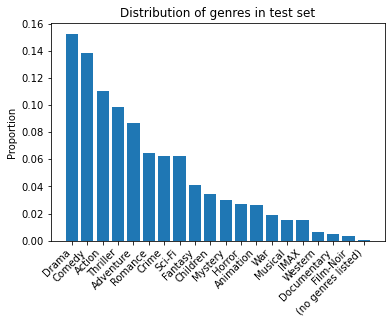

In [153]:
# plot!!!
unique_elements, counts_elements = np.unique(test_genres, return_counts=True)

# change counts to proportions
counts_elements = counts_elements / sum(counts_elements)

# make dictionary
counts = dict(zip(unique_elements, counts_elements))

# sort
sorted_genres = sorted(counts, key=counts.get, reverse=True)
sorted_counts = []
for w in sorted_genres:
    sorted_counts.append(counts[w])

# plot
plt.bar(sorted_genres, sorted_counts)
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of genres in test set')
plt.ylabel('Proportion')
plt.show()

In [154]:
# display proportions to see exact values
counts

{'(no genres listed)': 0.0001447754171341706,
 'Action': 0.11086177567049114,
 'Adventure': 0.08693763798906945,
 'Animation': 0.026240544355568423,
 'Children': 0.034130804589380725,
 'Comedy': 0.13855007419740129,
 'Crime': 0.06265156176481233,
 'Documentary': 0.0045242317854428315,
 'Drama': 0.1530638097651019,
 'Fantasy': 0.04079047377755257,
 'Film-Noir': 0.00354699771978718,
 'Horror': 0.027181584566940534,
 'IMAX': 0.015056643381953744,
 'Musical': 0.015490969633356257,
 'Mystery': 0.02975134822107206,
 'Romance': 0.06438886677042238,
 'Sci-Fi': 0.06265156176481233,
 'Thriller': 0.09866444677693728,
 'War': 0.01882080422744218,
 'Western': 0.006551087625321221}

## Full

In [155]:
# repeat on full dataset
# read in data with genres for users with errors
genres_df = pd.read_csv('error_genres_all.csv', header=None, names=['userId', 'movieID', 'genres'])
genres_df['genres'] = genres_df['genres'].apply(lambda x: np.array(x.split('|')))
genres_df

,userId,movieID,genres
0,148,85,"[Drama, Romance]"
1,148,830,[Comedy]
2,148,376,"[Action, Thriller]"
3,148,65,[Comedy]
4,148,92,"[Drama, Horror, Thriller]"
...,...,...,...
1196,445,1445,"[Comedy, War]"
1197,445,808,"[Adventure, Children]"
1198,445,653,"[Action, Adventure, Fantasy]"
1199,445,719,[Comedy]


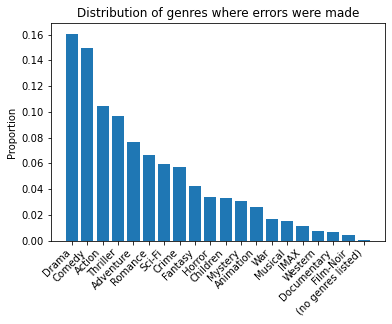

In [156]:
# plot!!!
unique_elements, counts_elements = np.unique(error_genres, return_counts=True)

# change counts to proportions
counts_elements = counts_elements / sum(counts_elements)

# make dictionary
counts = dict(zip(unique_elements, counts_elements))

# sort
sorted_genres = sorted(counts, key=counts.get, reverse=True)
sorted_counts = []
for w in sorted_genres:
    sorted_counts.append(counts[w])

# plot
plt.bar(sorted_genres, sorted_counts)
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of genres where errors were made')
plt.ylabel('Proportion')
plt.show()

In [157]:
# display proportions to see exact values
counts

{'(no genres listed)': 0.00021746221593998044,
 'Action': 0.10427313254322061,
 'Adventure': 0.0766554311188431,
 'Animation': 0.026421659236707622,
 'Children': 0.033380450146787,
 'Comedy': 0.14939654235076655,
 'Crime': 0.05697510057627487,
 'Documentary': 0.006741328694139393,
 'Drama': 0.16092203979558553,
 'Fantasy': 0.04240513210829618,
 'Film-Noir': 0.004349244318799609,
 'Horror': 0.03403283679460694,
 'IMAX': 0.011525497444818962,
 'Musical': 0.01543981733173861,
 'Mystery': 0.03087963466347722,
 'Romance': 0.06643470696966403,
 'Sci-Fi': 0.059258453843644664,
 'Thriller': 0.0966619549853213,
 'War': 0.016527128411438514,
 'Western': 0.007502446449929325}

### Distribution of all genres in full test set

In [158]:
# now plot full distribution for comparison
test_genres_df = pd.read_csv('test_genres_all.csv', header=None, names=['movieID', 'genres'])
test_genres_df.head(20)

,movieID,genres
0,88744,Action|Drama|Sci-Fi|Thriller
1,2949,Action|Adventure|Thriller
2,185,Action|Crime|Thriller
3,7811,Drama|Sci-Fi
4,2278,Action|Crime|Thriller
5,500,Comedy|Drama
6,96821,Drama|Romance
7,1258,Horror
8,2858,Drama|Romance
9,372,Comedy|Drama|Romance


In [159]:
# drop NaN
test_genres_df.dropna(inplace=True)

# split genres
test_genres_df['genres'] = test_genres_df['genres'].apply(lambda x: np.array(x.split('|')))

test_genres = test_genres_df['genres'].tolist()
test_genres = np.concatenate(test_genres).ravel()
test_genres

array(['Action', 'Drama', 'Sci-Fi', ..., 'Drama', 'Comedy', 'War'],
      dtype='<U18')

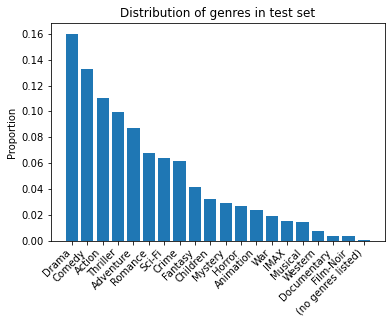

In [160]:
# plot!!!
unique_elements, counts_elements = np.unique(test_genres, return_counts=True)

# change counts to proportions
counts_elements = counts_elements / sum(counts_elements)

# make dictionary
counts = dict(zip(unique_elements, counts_elements))

# sort
sorted_genres = sorted(counts, key=counts.get, reverse=True)
sorted_counts = []
for w in sorted_genres:
    sorted_counts.append(counts[w])

# plot
plt.bar(sorted_genres, sorted_counts)
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of genres in test set')
plt.ylabel('Proportion')
plt.show()

In [161]:
# display proportions to see exact values
counts

{'(no genres listed)': 7.19847666778613e-05,
 'Action': 0.11034121048507238,
 'Adventure': 0.08709443647902727,
 'Animation': 0.023920470691570436,
 'Children': 0.03189745924720349,
 'Comedy': 0.13269241326306544,
 'Crime': 0.06188362202588545,
 'Documentary': 0.003706340902632463,
 'Drama': 0.16023728331912476,
 'Fantasy': 0.04170931932281037,
 'Film-Noir': 0.0035564511267836075,
 'Horror': 0.026676881775986636,
 'IMAX': 0.014932600730235002,
 'Musical': 0.01468637246290699,
 'Mystery': 0.0294250852514919,
 'Romance': 0.06751955832838186,
 'Sci-Fi': 0.06383932031310548,
 'Thriller': 0.09970374568360502,
 'War': 0.019065602745270263,
 'Western': 0.00703984107916333}